In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Feature Engineering: Step 1 데이터 확인하기

In [19]:
df = pd.read_csv('C:/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.isnull().sum()
# 강사)실무에서는 더 엄정한 검사 필요

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
# 불러온 데이터의 클래스 분포 확인하기
df.groupby(by=['Class']).count() # sql select Class, count(*) from df group by Class # agg function: min max mean count

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [23]:
print(f"Target class is {492/(284315+491)*100:.04f}%") # imbalanced data set(class imbalance, target scarcity)
# 실무에서도 타겟의 수가 부족한 문제를 많이 만나게된다.

Target class is 0.1727%


In [24]:
# 데이터 스케일 조정하기
from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
rob_scaler = RobustScaler() ##

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# 원 데이터에서 Time 컬럼과 Amount 컬럼 제외하기
# df.drop(['Time','Amount'], axis=1, inplace=True) # True가 아니라 False라면 inplace 가 되지 않음

In [25]:
# 스케일 조정된 컬럼 추가하기
# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=False)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# 스케일 조정된 데이터 확인하기

# df.head()

In [26]:
# 원데이터 유지
df_original = df.copy()
df_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.296653,1.034951
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.038986,1.034963
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.641096,1.034975
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.167680,1.034975


In [27]:
# X와 y 데이터 셋 만들기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 나누기
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [28]:
# 클래스의 skew 정도가 매우 높기 때문에 클래스간 분포를 맞추는 것이 필요합니다.
# 셔플링을 통해 레이블이 한쪽에 몰려있지 않도록 하겠습니다.

df = df.sample(frac=1)

# 데이터 준비
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# 데이터 셔플하기
new_df = normal_distributed_df.sample(frac=1, random_state=0)

# 셔플한 새로운 데이터 셋 확인
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,4.781527,-0.507372
108411,70884.0,-5.403360,3.752104,-1.974690,0.286840,-3.043008,-1.244213,-2.271373,2.953083,0.584603,...,0.268837,0.733644,0.038913,0.241270,-1.334412,-0.195977,3.94,0,-0.252358,-0.162220
57248,47826.0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58,1,-0.201495,-0.433111
271157,164440.0,-0.399564,1.798309,0.319183,4.139896,1.238610,2.211578,0.149017,0.960118,-2.171171,...,0.267360,-0.488553,-1.105636,0.112709,0.393938,0.211160,7.56,0,-0.201775,0.936900
270847,164287.0,-0.477056,0.108695,-0.822416,-1.150033,1.174039,-0.010500,1.127760,0.165769,0.356065,...,0.291374,-0.303871,-0.714758,-0.338249,0.141929,0.258381,142.44,0,1.682946,0.935103


In [29]:
df_plot = df.copy()

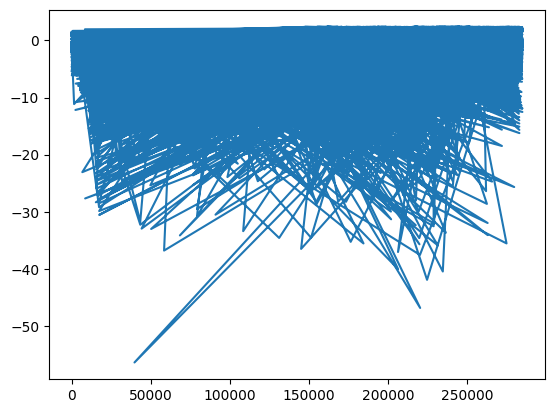

In [30]:
df_plot['V1'].plot()
plt.show()
# 강의랑 다름 버전차이?

<Axes: >

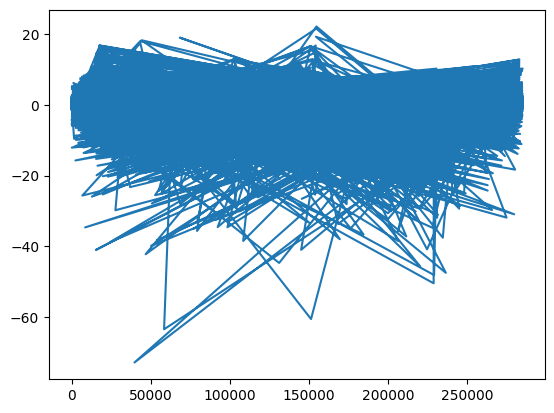

In [31]:
df_plot['V2'].plot()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 138730 to 159754
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul